### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv(r"C:\Users\Monis\OneDrive\Desktop\Plaksha\1_Academics\Term 4\2_Data_Science_and_Applications\1Assignments\4_Final_Assignment\Data_2\vaccinations.csv")

In [3]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156518 entries, 0 to 156517
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   location                             156518 non-null  object 
 1   iso_code                             156518 non-null  object 
 2   date                                 156518 non-null  object 
 3   total_vaccinations                   72497 non-null   float64
 4   people_vaccinated                    69398 non-null   float64
 5   people_fully_vaccinated              66744 non-null   float64
 6   total_boosters                       41255 non-null   float64
 7   daily_vaccinations_raw               60144 non-null   float64
 8   daily_vaccinations                   155416 non-null  float64
 9   total_vaccinations_per_hundred       72497 non-null   float64
 10  people_vaccinated_per_hundred        69398 non-null   float64
 11  people_fully_

In [19]:
full_df["date"] = pd.to_datetime(full_df["date"])

In [20]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156518 entries, 0 to 156517
Data columns (total 16 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   location                             156518 non-null  object        
 1   iso_code                             156518 non-null  object        
 2   date                                 156518 non-null  datetime64[ns]
 3   total_vaccinations                   156518 non-null  float64       
 4   people_vaccinated                    69398 non-null   float64       
 5   people_fully_vaccinated              66744 non-null   float64       
 6   total_boosters                       41255 non-null   float64       
 7   daily_vaccinations_raw               60144 non-null   float64       
 8   daily_vaccinations                   155416 non-null  float64       
 9   total_vaccinations_per_hundred       72497 non-null   float64       
 

In [21]:
# this is the cummulative sum of vaccinations 
full_df["total_vaccinations"] = full_df["total_vaccinations"].fillna(0)

In [22]:
full_df["total_vaccinations"] = full_df["total_vaccinations"].fillna(0)
# full_df["daily_vaccinations"] = full_df["daily_vaccinations"].fillna(0)

In [23]:
to_plot_data = full_df.groupby(["date"]).agg(
                                             {'total_vaccinations' : 'sum'}
                                            ).reset_index()

In [24]:
# excluding rows that are zero
to_plot_data = to_plot_data[to_plot_data["total_vaccinations"]!=0]

In [25]:
to_plot_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 2 to 811
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                810 non-null    datetime64[ns]
 1   total_vaccinations  810 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.0 KB


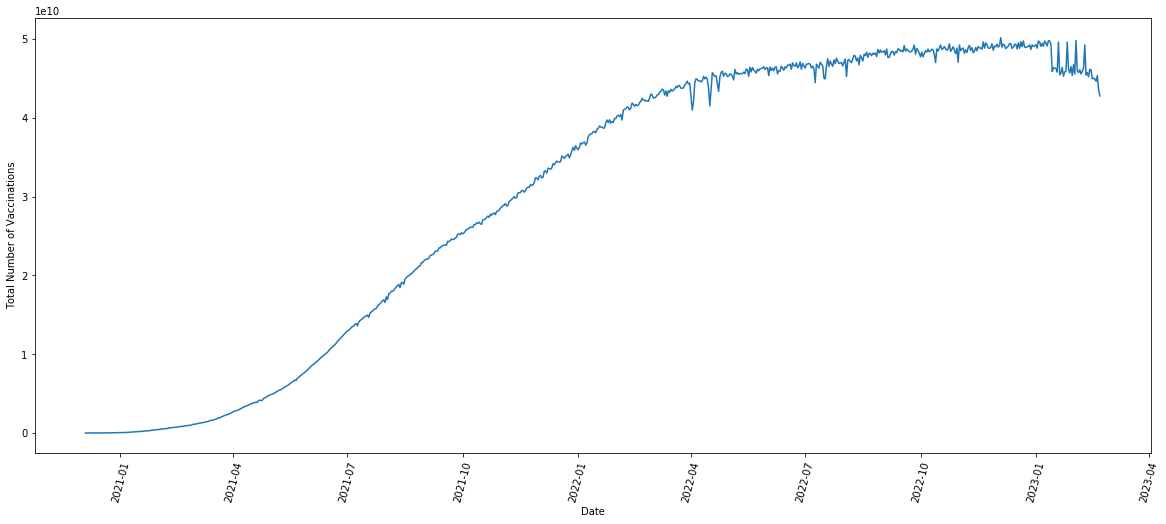

In [28]:
plt.figure(figsize=(20, 8))
plt.plot_date(to_plot_data["date"].tolist(), to_plot_data["total_vaccinations"], fmt = '-');
# plt.grid(1)
plt.ylabel("Total Number of Vaccinations")
plt.xlabel("Date")
plt.xticks(rotation = 75);

In [29]:
to_plot_data["day"] = np.arange(len(to_plot_data.index))
to_plot_data.head()

,date,total_vaccinations,day
2,2020-12-04,5.0,0
3,2020-12-05,4.0,1
4,2020-12-06,4.0,2
5,2020-12-07,10.0,3
6,2020-12-08,33.0,4


In [30]:
to_plot_data.sort_values(by = ["date"], ascending=True, inplace=True)

In [31]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = to_plot_data.loc[:, ['day']]
Y = to_plot_data.loc[:, 'total_vaccinations']
reg = linear_model.LinearRegression()
ridge_reg = linear_model.Ridge(alpha=0.5)
lasso_reg = linear_model.Lasso(alpha=0.5)

reg.fit(X, Y)
ridge_reg.fit(X, Y)
lasso_reg.fit(X, Y)

Lasso(alpha=0.5)

In [33]:
reg_preds = reg.predict(X)
ridge_preds = ridge_reg.predict(X)
lasso_preds = lasso_reg.predict(X)

In [34]:
for preds, name in zip([reg_preds, ridge_preds, lasso_preds], ["Regression", "Ridge", "Lasso"]):
    print(f"The mean squared error for {name} is {mean_squared_error(preds, Y)}")
    print(f"The R2 score for {name} is {r2_score(preds, Y)}")
    print("\n")

The mean squared error for Regression is 3.3303728746270065e+19
The R2 score for Regression is 0.8906996351433383


The mean squared error for Ridge is 3.3303728746270106e+19
The R2 score for Ridge is 0.8906996326753194


The mean squared error for Lasso is 3.3303728746270065e+19
The R2 score for Lasso is 0.8906996351433115




In [35]:
from matplotlib.dates import drange
import datetime
delta = datetime.timedelta(days = 1)
dates = drange(to_plot_data["date"].min(), to_plot_data["date"].max(), delta)


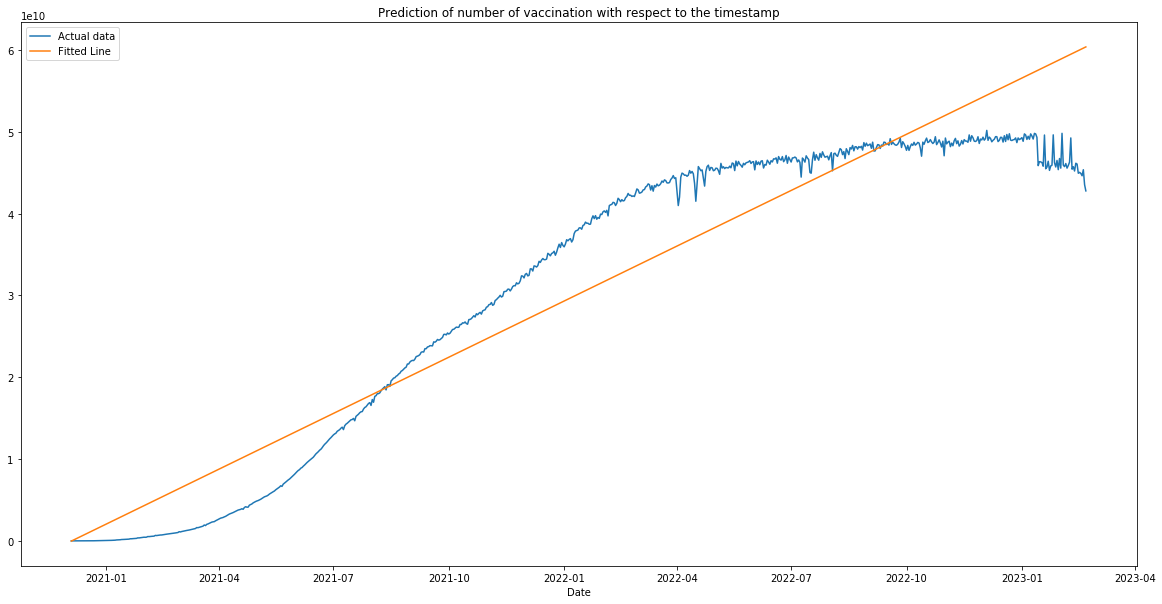

In [36]:
plt.figure(figsize=(20, 10))
plt.plot_date(to_plot_data["date"].tolist(), Y, label = 'Actual data', fmt = '-')
plt.plot_date(to_plot_data["date"].tolist(), reg_preds, label = 'Fitted Line', fmt = '-')
plt.title("Prediction of number of vaccination with respect to the timestamp")
plt.xlabel("Date")
plt.legend();

In [37]:
south_korea_df = full_df[full_df["location"] == "South Korea"]

In [38]:
south_korea_df["total_vaccinations"] = south_korea_df["total_vaccinations"].fillna(0)

In [39]:
skr_df = south_korea_df.iloc[1:]
skr_df.reset_index(drop = True, inplace = True)

In [40]:
skr_df = skr_df.groupby(['date']).agg({'total_vaccinations' : 'sum'}).reset_index()

In [41]:
skr_df = skr_df[(skr_df["date"]>="2021-08-01") & (skr_df["date"]<="2021-10-08")]
skr_df["dates"] = np.arange(len(skr_df.index))

In [42]:
train_df = skr_df[(skr_df["date"]>="2021-08-01") & (skr_df["date"]<="2021-09-30")]
test_df = skr_df[skr_df["date"]>="2021-10-01"].head(8)

In [43]:
X_train = train_df.loc[:, ['dates']]
Y_train = train_df.loc[:, 'total_vaccinations']

reg.fit(X_train, Y_train)

LinearRegression()

In [44]:
X_test = test_df.loc[:, ['dates']]
Y_test = test_df.loc[:, 'total_vaccinations']

In [45]:
skr_preds = reg.predict(X_test)

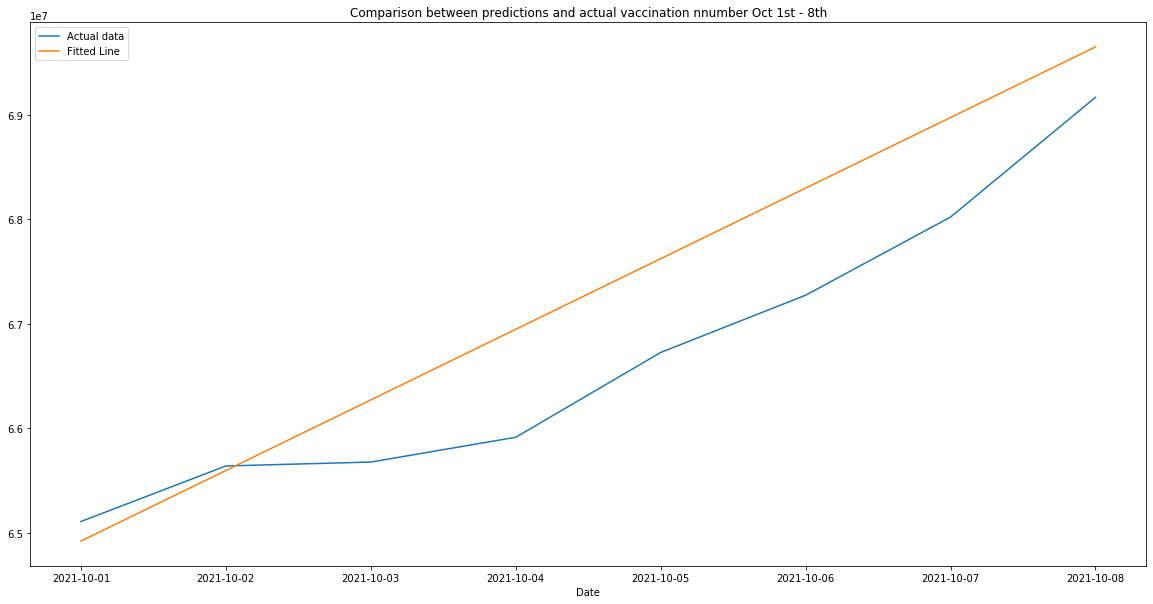

In [47]:
plt.figure(figsize=(20, 10))
plt.plot_date(test_df["date"].tolist(), Y_test, label = 'Actual data', fmt = '-')
plt.plot_date(test_df["date"].tolist(), skr_preds, label = 'Fitted Line', fmt = '-')
plt.title("Comparison between predictions and actual vaccination nnumber Oct 1st - 8th")
plt.xlabel("Date")
plt.legend();

In [56]:
RMSE = mean_squared_error(skr_preds, Y_test)**0.5
NRMSE = (mean_squared_error(skr_preds, Y_test))**0.5 / (max(Y_test) - min(Y_test))

In [58]:
print(f"The root mean squared error is {round(RMSE, 4)}")
print(f"The normalised root mean squared error is {round(NRMSE, 4)}")

The root mean squared error is 745358.0723
The normalised root mean squared error is 0.1838
